Working with financial data
---

In [23]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
### Explanation in https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
#import pandas_datareader as web
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import random
import yfinance as yf  

In [24]:
start, end = '2015-01-01', '2018-01-01'

tickers = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
ticker = 'SPY'
df = yf.download(ticker,start, end)
df.head()
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df.columns=[ticker]

nbTickers = len(tickers)
nbExtract = 5 ## Number of tickers to consider
listExtractTickers = [ticker]
listTemp = random.sample(tickers, 5)
for i in range(nbExtract):
    listExtractTickers.append(listTemp[i]) ## select nbExtract out of the whole list
print("List of extracted tickers: ", listExtractTickers)

[*********************100%***********************]  1 of 1 downloaded
List of extracted tickers:  ['SPY', 'DISH', 'AMGN', 'PM', 'UAA', 'MAT']


In [25]:
## We construct a DataFrame with the first 5 tickers only
for ticker in listExtractTickers[1:]:
    df0 = yf.download(ticker, start, end)
    df0 = df0.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
    df0.columns=[ticker]
    df = pd.concat([df, df0], axis=1)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [18]:
print("Total number of tickers:", nbTickers)
print("Numer of rows:", len(df))
print("Number of tickers selected:", nbExtract)

Total number of tickers: 505
Numer of rows: 755
Number of tickers selected: 5


In [19]:
df.head()

SPY    YUM    CCL  XL    PRU     TIF
Date                                               
2015-01-02  205.43  52.01  45.61 NaN  90.11  105.50
2015-01-05  201.72  50.96  45.39 NaN  87.25  103.75
2015-01-06  199.82  50.33  45.83 NaN  85.44  102.17
2015-01-07  202.31  52.00  46.00 NaN  85.49  105.18
2015-01-08  205.90  52.90  46.68 NaN  86.86  105.14

In [20]:
df.describe()

SPY         YUM         CCL   XL         PRU         TIF
count  755.000000  755.000000  755.000000  0.0  755.000000  755.000000
mean   220.075722   63.174795   53.338755  NaN   90.200914   82.130940
std     19.700114    8.431299    7.620646  NaN   14.723602   11.118335
min    182.860000   46.900000   41.920000  NaN   58.000000   57.480000
25%    206.580000   57.230000   47.345000  NaN   78.640000   72.805000
50%    212.480000   63.330000   50.880000  NaN   85.460000   84.690000
75%    236.650000   66.265000   58.560000  NaN  105.570000   91.970000
max    268.200000   83.470000   69.480000  NaN  117.150000  105.500000

### Plotting a time series and rolling windows

In [100]:
oneTicker = random.sample(listExtractTickers, 1)[0] ## select one ticker
print "Chosen ticker: ", oneTicker
timeSeries = df[oneTicker]

Chosen ticker:  WAT


[]

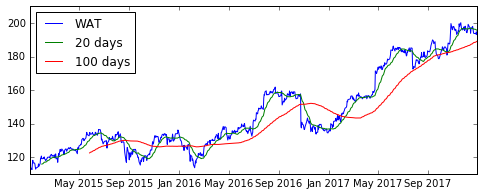

In [101]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rol = timeSeries.rolling(window=20).mean()
long_rol = timeSeries.rolling(window=100).mean()

plt.figure(figsize=(8,3))
plt.plot(timeSeries.index, timeSeries, label=oneTicker)
plt.plot(short_rol.index, short_rol, label='20 days')
plt.plot(long_rol.index, long_rol, label='100 days')
plt.legend(loc='best')
plt.plot()

### Comparing the different stocks

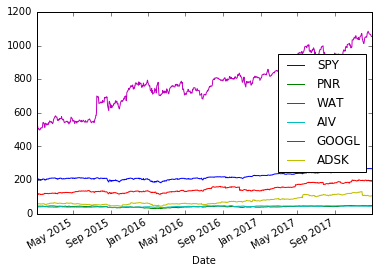

In [102]:
df.plot();

It is not easy to compare the different stocks, as their values may not be of the same order. It is usual to work on the returns insted.

In [103]:
returns = df.pct_change(1)
returns.head()

SPY       PNR       WAT       AIV     GOOGL      ADSK
Date                                                                  
2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN
2015-01-05 -0.018060 -0.040792 -0.007552  0.008709 -0.019054 -0.014614
2015-01-06 -0.009419 -0.008599 -0.004335  0.008111 -0.024679 -0.019775
2015-01-07  0.012461  0.007570  0.030214  0.010122 -0.002941 -0.002087
2015-01-08  0.017745  0.025982  0.018632  0.010791  0.003484  0.024747

In [104]:
log_returns = np.log(df).diff()
log_returns.head()

SPY       PNR       WAT       AIV     GOOGL      ADSK
Date                                                                  
2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN
2015-01-05 -0.018225 -0.041647 -0.007580  0.008672 -0.019238 -0.014722
2015-01-06 -0.009464 -0.008636 -0.004345  0.008078 -0.024989 -0.019973
2015-01-07  0.012384  0.007541  0.029767  0.010071 -0.002945 -0.002089
2015-01-08  0.017589  0.025650  0.018460  0.010734  0.003478  0.024446

#### Remove the NaN values

In [105]:
log_returns = log_returns.dropna()
log_returns.head()

SPY       PNR       WAT       AIV     GOOGL      ADSK
Date                                                                  
2015-01-05 -0.018225 -0.041647 -0.007580  0.008672 -0.019238 -0.014722
2015-01-06 -0.009464 -0.008636 -0.004345  0.008078 -0.024989 -0.019973
2015-01-07  0.012384  0.007541  0.029767  0.010071 -0.002945 -0.002089
2015-01-08  0.017589  0.025650  0.018460  0.010734  0.003478  0.024446
2015-01-09 -0.008046 -0.006581 -0.013384  0.005324 -0.012286 -0.009054

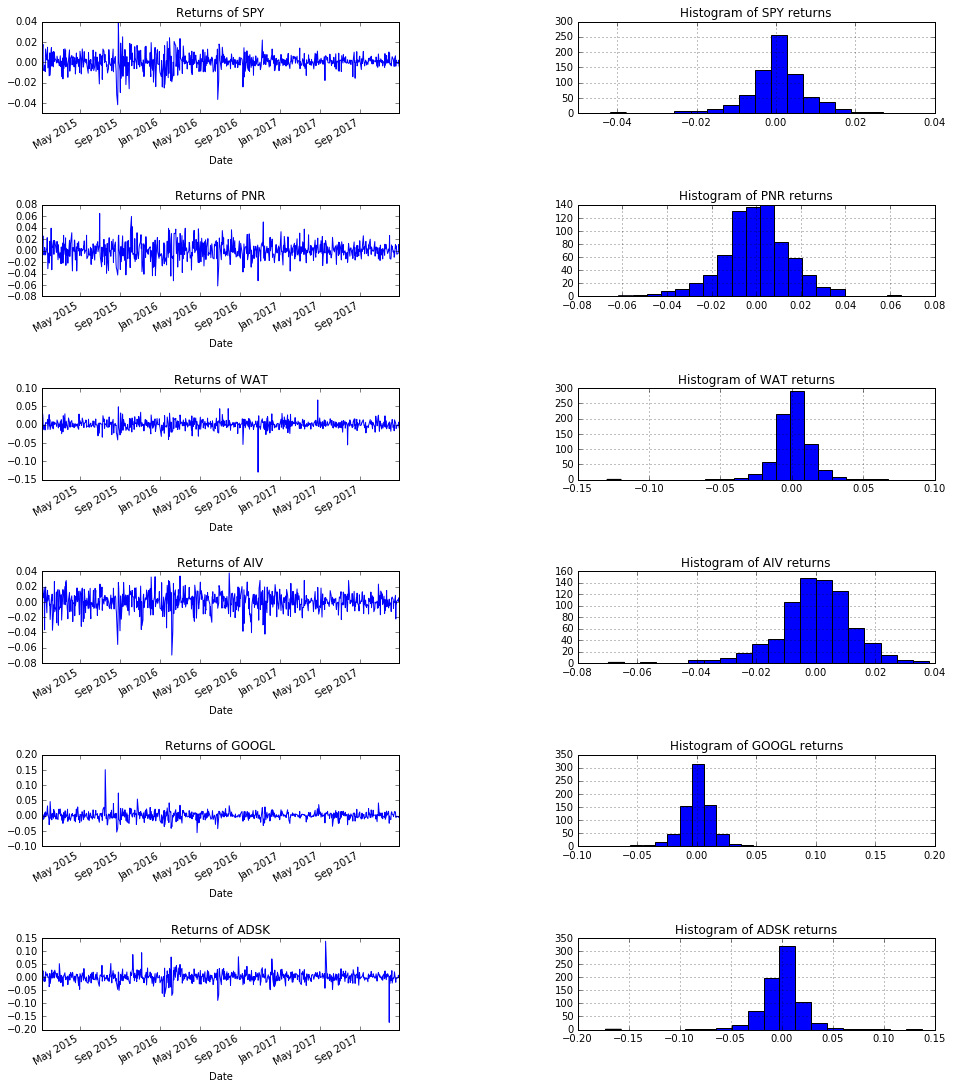

In [106]:
nb = len(listExtractTickers)
fig, axs = plt.subplots(nrows=nb, ncols=2, figsize=(16, 20))
for i in range(nb):
    ticker = listExtractTickers[i]
    plt.subplot(nb, 2, 2*i+1)
    log_returns[ticker].plot()
    plt.title('Returns of %s' %ticker)
    plt.subplot(nb, 2, 2*i+2)
    log_returns[ticker].hist(bins=20)
    plt.title('Histogram of %s returns' %ticker)
plt.subplots_adjust(hspace=1., wspace=0.5)
plt.show()